<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/Deep_AI/Course-2/Course_2_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-07-28 18:43:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.99.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   149MB/s    in 1.3s    

2020-07-28 18:44:00 (149 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-07-28 18:44:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rp

In [ ]:
dir = '/content/sample_data'
#rps_path = os.path.join(path,'rps')
#os.mkdir(rps_path)
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(dir)
zip_ref.close()
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(dir)
zip_ref.close()

In [ ]:
rps_dir = os.path.join(dir,'rps')
test_rps_dir = os.path.join(dir,'rps-test-set')

rock_dir = os.path.join(rps_dir, 'rock')
paper_dir = os.path.join(rps_dir, 'paper')
scissors_dir = os.path.join(rps_dir, 'scissors')
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-039.png', 'rock04-043.png', 'rock03-016.png', 'rock07-k03-045.png', 'rock06ck02-061.png', 'rock01-000.png', 'rock06ck02-080.png', 'rock05ck01-082.png', 'rock02-115.png', 'rock04-064.png']
['paper07-022.png', 'paper01-003.png', 'paper05-045.png', 'paper07-095.png', 'paper05-110.png', 'paper05-026.png', 'paper01-005.png', 'paper05-009.png', 'paper04-011.png', 'paper01-093.png']
['testscissors02-069.png', 'testscissors03-074.png', 'scissors04-037.png', 'testscissors02-063.png', 'testscissors02-081.png', 'scissors03-029.png', 'testscissors01-012.png', 'scissors02-097.png', 'testscissors01-025.png', 'scissors02-011.png']


In [ ]:
%matplotlib inline

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
	rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
train_gen = training_datagen.flow_from_directory(directory=rps_dir,
                                                 target_size = (150, 150),
                                                 class_mode = 'categorical',
                                                 batch_size = 126)
test_gen = validation_datagen.flow_from_directory(directory=test_rps_dir,
                                                 target_size = (150, 150),
                                                 class_mode = 'categorical',
                                                 batch_size = 126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-07-28 18:44:56--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.28.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   178MB/s    in 0.5s    

2020-07-28 18:44:56 (178 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
inception_network = InceptionV3(include_top=False,
                                weights=None,
                                input_shape= (150,150,3))
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inception_network.load_weights(local_weights_file)

for layer in inception_network.layers:
    layer.trainable = False
#inception_network.summary()

last_layer = inception_network.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

x = Flatten()(last_output)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=3, activation='softmax')(x)

model = Model(inputs = inception_network.input, outputs = x)
model.compile(optimizer = RMSprop(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

last layer output shape: (None, 7, 7, 768)


In [ ]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98.0% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()
history = model.fit(train_gen, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data = test_gen, 
                    verbose = 1, 
                    validation_steps=3,
                    callbacks= [callback])

Epoch 1/25
20/20 [==============================] - 21s 1s/step - loss: 5.2375 - accuracy: 0.7302 - val_loss: 0.5903 - val_accuracy: 0.8118
Epoch 2/25
20/20 [==============================] - 19s 943ms/step - loss: 0.5210 - accuracy: 0.9159 - val_loss: 0.0373 - val_accuracy: 0.9839
Epoch 3/25
20/20 [==============================] - 19s 933ms/step - loss: 0.3605 - accuracy: 0.9079 - val_loss: 0.1254 - val_accuracy: 0.9624
Epoch 4/25
20/20 [==============================] - 18s 924ms/step - loss: 0.2536 - accuracy: 0.9337 - val_loss: 0.3211 - val_accuracy: 0.9032
Epoch 5/25
20/20 [==============================] - 19s 930ms/step - loss: 0.1640 - accuracy: 0.9508 - val_loss: 0.0640 - val_accuracy: 0.9704
Epoch 6/25
20/20 [==============================] - 19s 934ms/step - loss: 0.0551 - accuracy: 0.9790 - val_loss: 0.1159 - val_accuracy: 0.9651
Epoch 7/25
20/20 [==============================] - 19s 942ms/step - loss: 0.2982 - accuracy: 0.9381 - val_loss: 0.1362 - val_accuracy: 0.9651
Ep

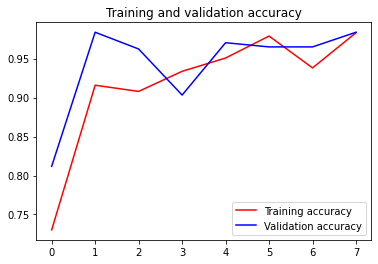

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to scissors7.png
Savi

In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        spamreader = csv.reader(training_file)
        labels = []
        images = []
        for row in spamreader:
            labels.append(row[0])
            img = row[1:]
            img = np.array_split(img, 28)
            img = np.vstack(img)
            images.append(img.tolist())
            #print(np.shape(images))

            
      # Your code starts here
    
      # Your code ends here
        #print(labels[1:10])
        #print(images[1:10])
    return np.array(images[1:]).astype(int), np.array(labels[1:]).astype(int)

# path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
# path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
# training_images, training_labels = get_data(path_sign_mnist_train)
# testing_images, testing_labels = get_data(path_sign_mnist_test)

# # Keep these
# print(training_images.shape)
# print(training_labels.shape)
# print(testing_images.shape)
# print(testing_labels.shape)

# # Their output should be:
# # (27455, 28, 28)
# # (27455,)
# # (7172, 28, 28)
# # (7172,)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]]


In [ ]:
x=np.array(['1','2']).astype(int)
x

array([1, 2])

In [ ]:
temp_var=np.arange(16)
print(temp_var.shape)
temp_var = temp_var.reshape((4,4)).astype(int)
temp_var = np.expand_dims(temp_var, axis =2)
print(temp_var.shape)


(16,)
(4, 4, 1)


In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        spamreader = csv.reader(training_file)
        labels = []
        images = np.array([])
        for row in spamreader:
            labels.append(row[0])
            img = row[1:]
            print(row[1:])
            img = np.array_split(img, 28)
            img = np.vstack(img)
            images.append(img)
            
      # Your code starts here
    
      # Your code ends here
        print(labels[1:10])
        print(images[1:10])
    return images[1:], np.array(labels[1:])

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)